# EDA Case Study

In [1]:
#importing the libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
pd.set_option('display.max_columns', 100)


In [2]:
df = pd.read_csv("application_data.csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [6]:
df.shape

(307511, 122)

#### Cleaning the columns with missing values more than 50%

In [7]:
#finding the columns with more than 50% null values 

missing_data_cols = df.isnull().sum()
missing_data_cols=missing_data_cols[missing_data_cols.values>(0.5*len(missing_data_cols))]
len(missing_data_cols)


64

So, there are 64 columns having null values greater than 50% in the dataset. So we can drop those columns

In [8]:
#List of the columns with null values more than 50%
missing_data_cols = list(missing_data_cols[missing_data_cols.values>=0.5].index)
missing_data_cols

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPAR

In [9]:
#dropping those 64 columns

df.drop(labels=missing_data_cols,axis=1,inplace=True)

In [10]:
# count of columns with more than 50% null values
missing_data_cols = df.isnull().sum()
missing_data_cols=missing_data_cols[missing_data_cols.values>(0.5*len(missing_data_cols))]
len(missing_data_cols)

0

In [11]:
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

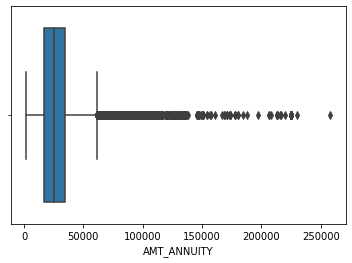

In [12]:
#Plotting the Box plot to check for outliers for AMT_ANNUITY column
sns.boxplot(df.AMT_ANNUITY)
plt.show()

Since the column has outliers we can not use Mean to impute the missing values. So we should use Median instead.

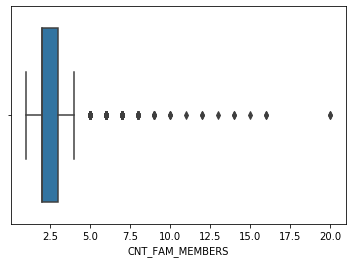

In [13]:
#Plotting the Box plot to check for outliers for CNT_FAM_MEMBERS column
sns.boxplot(df.CNT_FAM_MEMBERS)
plt.show()

Since this column also has outliers we can not use Mean to impute the missing values. So we should use Median instead.

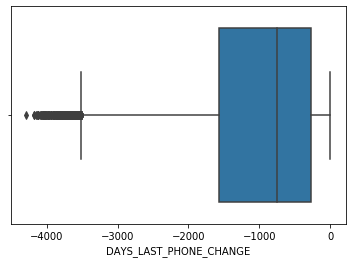

In [14]:
#Plotting the Box plot to check for outliers for DAYS_LAST_PHONE_CHANGE column
sns.boxplot(df.DAYS_LAST_PHONE_CHANGE)
plt.show()

In [15]:
df.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

So from Box plot and describe function we can observe that this column also has outliers we can not use Mean to impute the missing values. We can use Median here.
Also this column wont be used for analysis so this can be dropped.

In [16]:
# Dropping the columns which are not relevant for our analysis
irrelevant_cols=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=irrelevant_cols,axis=1,inplace=True)

In [17]:
df.shape

(307511, 28)

In [18]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED            

#### Correcting the data types of the columns

In [19]:
df.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_WORK_CITY              2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
LIVE_CITY_NOT_WORK_CITY             2
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       15
HOUR_APPR_PROCESS_START            24
ORGANIZATION_TYPE                  58
REGION_POPULATION_RELATIVE         81
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYED                   12574
AMT_ANNUITY                     13672
DAYS_REGISTRATION               15688
DAYS_BIRTH  

So we can observe and conclude that columns which have less than 40 unique values are categorical and the ones with more that 40 unique value can be considered as continous variables. So now we fill fix the data types of the categorical and continous variables

In [20]:
#converting the data type of Categorical columns to Object data type
df[["REG_CITY_NOT_LIVE_CITY","TARGET","REG_REGION_NOT_LIVE_REGION","REG_CITY_NOT_WORK_CITY","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","LIVE_CITY_NOT_WORK_CITY","CNT_CHILDREN","HOUR_APPR_PROCESS_START"]]=df[["REG_CITY_NOT_LIVE_CITY","TARGET","REG_REGION_NOT_LIVE_REGION","REG_CITY_NOT_WORK_CITY","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","LIVE_CITY_NOT_WORK_CITY","CNT_CHILDREN","HOUR_APPR_PROCESS_START"]].astype(object)

All the continous variables are already in float/int data type so no need to change their type

In [21]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


We can observe forthe columns DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH have negative values. So these need to be corrected.

In [22]:
df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']] = df[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].apply(lambda x: x.abs())

In [23]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion


Checking for outliers in Continous columns

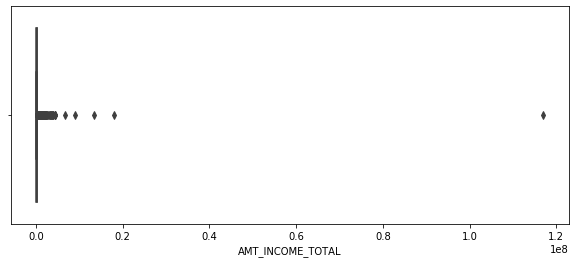

In [24]:
# for AMT_INCOME_TOTAL column
plt.figure(figsize = (10, 4))
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

Since the spread of the boxplot is too thin we can say that this column has outliers.

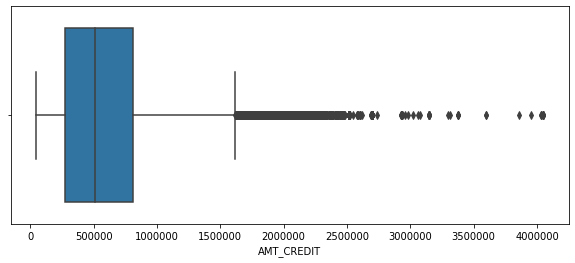

In [25]:
# for AMT_CREDIT column
plt.figure(figsize = (10, 4))
sns.boxplot(df.AMT_CREDIT)
plt.show()

The above boxplot shows the presence of outliers.

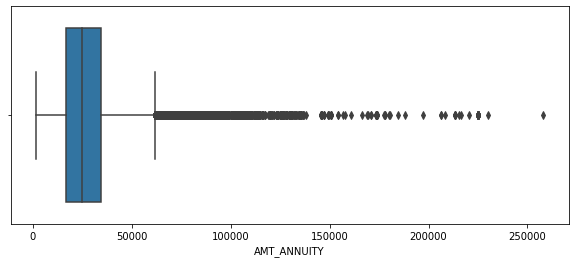

In [26]:
# for AMT_ANNUITY column
plt.figure(figsize = (10, 4))
sns.boxplot(df.AMT_ANNUITY)
plt.show()

The above boxplot shows the presence of outliers.

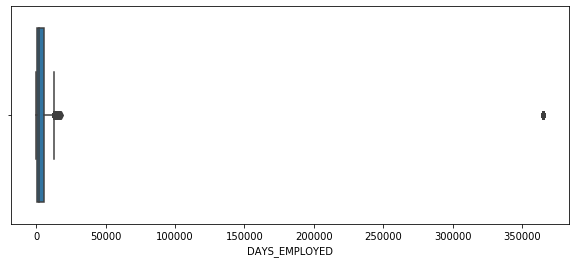

In [27]:
# for DAYS_EMPLOYED column
plt.figure(figsize = (10, 4))
sns.boxplot(df.DAYS_EMPLOYED)
plt.show()

The above boxplot shows the presence of few specific outliers of very high value compared to the rest of the values.

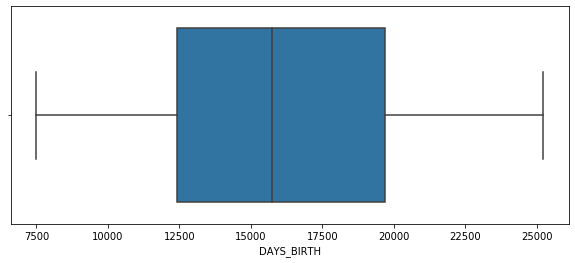

In [28]:
# for DAYS_BIRTH column
plt.figure(figsize = (10, 4))
sns.boxplot(df.DAYS_BIRTH)
plt.show()

For this column we do not observe any outliers 

#### Binning of continous variables 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [29]:
#Creating bins for AMT_INCOME_TOTAL column
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
slot = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000',
        '250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [30]:
# Creating bins for Credit amount

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000000]
slots = ['0-100000', '100000-200000','200000-300000', '300000-400000','400000-500000','500000-600000',
         '600000-700000','700000-800000','800000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

#### Data Imbalance

In [31]:
#Checking the data imbalance percentage
100*df.TARGET.value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

So we can observe a huge data imbalance for the Target variable column. 

#### DIviding the data set into two subsets of Target=0 and Target=1

In [32]:
df_1 = df[df['TARGET']==1]
df_0 = df[df['TARGET']==0]

In [33]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-250000,400000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,100000-150000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,200000-250000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,THURSDAY,11,0,0,0,0,0,0,Self-employed,100000-150000,200000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,5391.0,4199,THURSDAY,10,0,0,0,0,0,0,XNA,50000-100000,200000-300000


In [34]:
df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,250000-300000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,50000-100000,100000-200000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,100000-150000,300000-400000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,100000-150000,500000-600000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other,50000-100000,400000-500000


### Univariate and Bivariate analysis of the columns

#### Univariate analysis of the continous variables

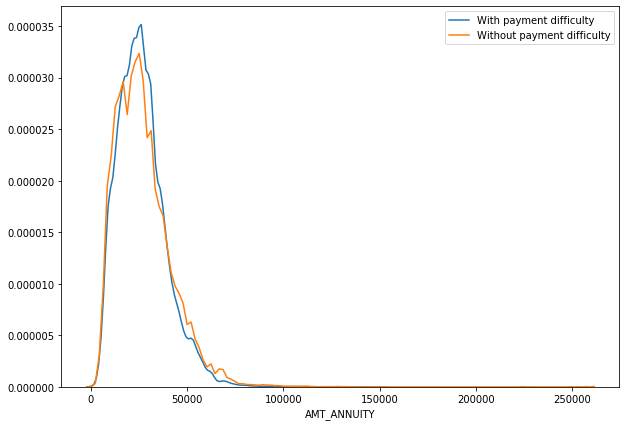

In [35]:
# For AMT_INCOME_TOTAL column for both the categories of Target coulmns

plt.figure(figsize = (10, 7))
sns.distplot(df_1['AMT_ANNUITY'], hist = False, label = 'With payment difficulty')
sns.distplot(df_0['AMT_ANNUITY'], hist = False, label = 'Without payment difficulty')
plt.show()

Observations
1. We can observe that the loan annuity for both categories of Target audience appears to be similar
2. Most of the people with payment difficulty have annuity of around 25000

<Figure size 1080x360 with 0 Axes>

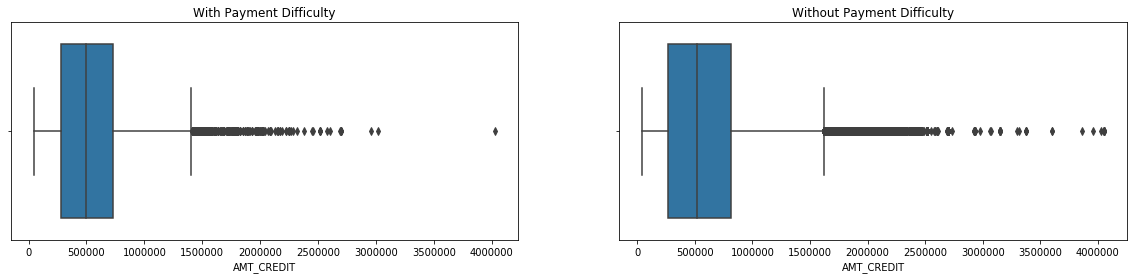

In [36]:
# For AMT_INCOME_TOTAL column for the people having Payment Difficulty 

plt.figure(figsize = (15, 5))
plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.boxplot(df_1['AMT_CREDIT'])


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.boxplot(df_0['AMT_CREDIT'])
plt.show()

Observations
1. We can observe that the mean credit amount  is around 500000
2. The spread credit amount majorly appears to be in the range of 250000 - 750000.

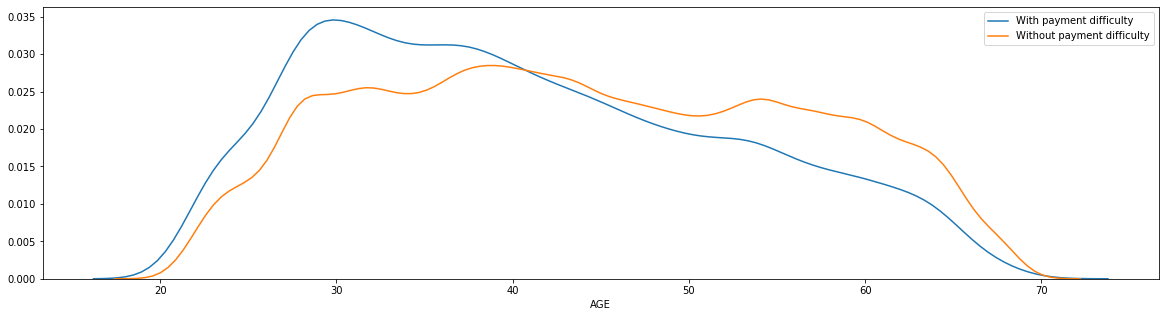

In [37]:
# For DAYS_BIRTH column or the age of applicants for both the categories of Target coulmns

plt.figure(figsize = (20,5))
sns.distplot(df_1['DAYS_BIRTH'].apply(lambda x: x/365), hist = False, label = 'With payment difficulty')
sns.distplot(df_0['DAYS_BIRTH'].apply(lambda x: x/365), hist = False, label = 'Without payment difficulty')
plt.xlabel("AGE")
plt.show()


 For the people who have difficulty with payment are mostly of age 30 years

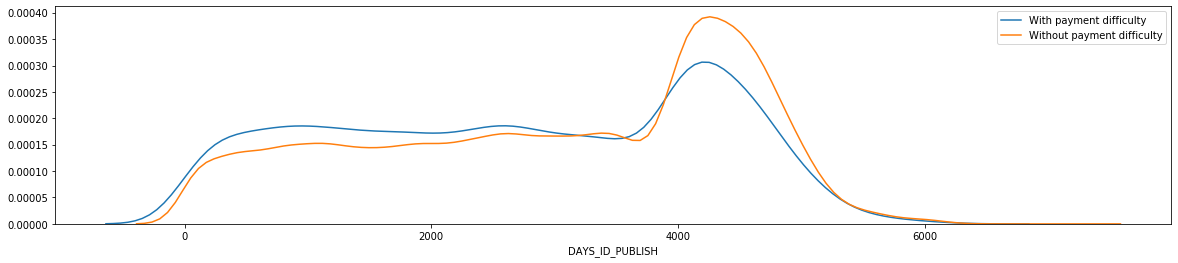

In [38]:
# For DAYS_ID_PUBLISH column or the age of applicants for both the categories of Target coulmns
plt.figure(figsize = (20,4))
sns.distplot(df_1['DAYS_ID_PUBLISH'], hist = False, label = 'With payment difficulty')
sns.distplot(df_0['DAYS_ID_PUBLISH'], hist = False, label = 'Without payment difficulty')
plt.show()


Most of the people have changed the ID document around 4200 days before the loan application 

#### Univariate analysis of the categorical variables

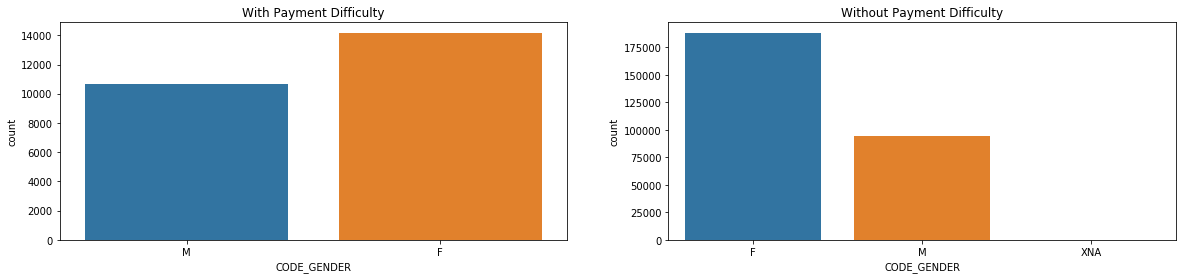

In [39]:
# CODE_GENDER column for both Target types

plt.figure(figsize = (20, 4))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(df_1['CODE_GENDER'])


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(df_0['CODE_GENDER'])
plt.show()

Female count is higher than male.

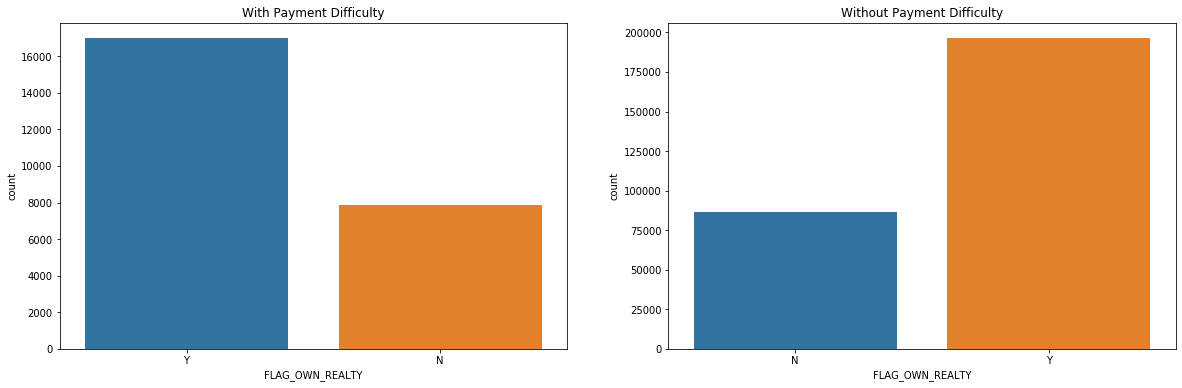

In [40]:
# FLAG_OWN_REALTY column for both Target types

plt.figure(figsize = (20, 6))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(df_1['FLAG_OWN_REALTY'])


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(df_0['FLAG_OWN_REALTY'])
plt.show()

The number of applicants owning a house is high for both scenarios.

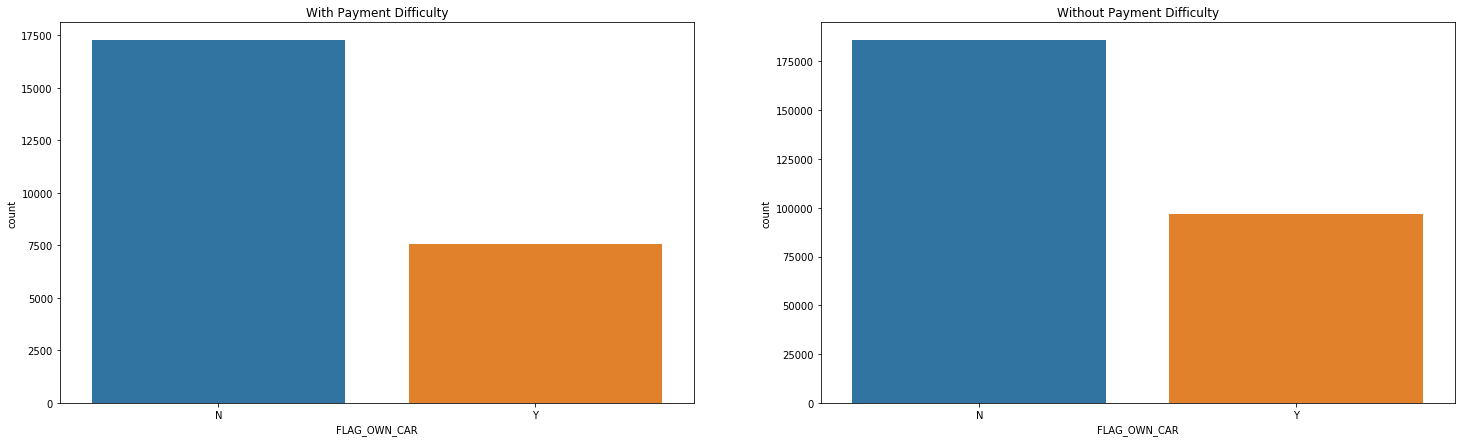

In [41]:
# FLAG_OWN_CAR column for both Target types

plt.figure(figsize = (25, 7))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(df_1['FLAG_OWN_CAR'])


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(df_0['FLAG_OWN_CAR'])
plt.show()

Majority of the applicants do not own a Car in both scenario.

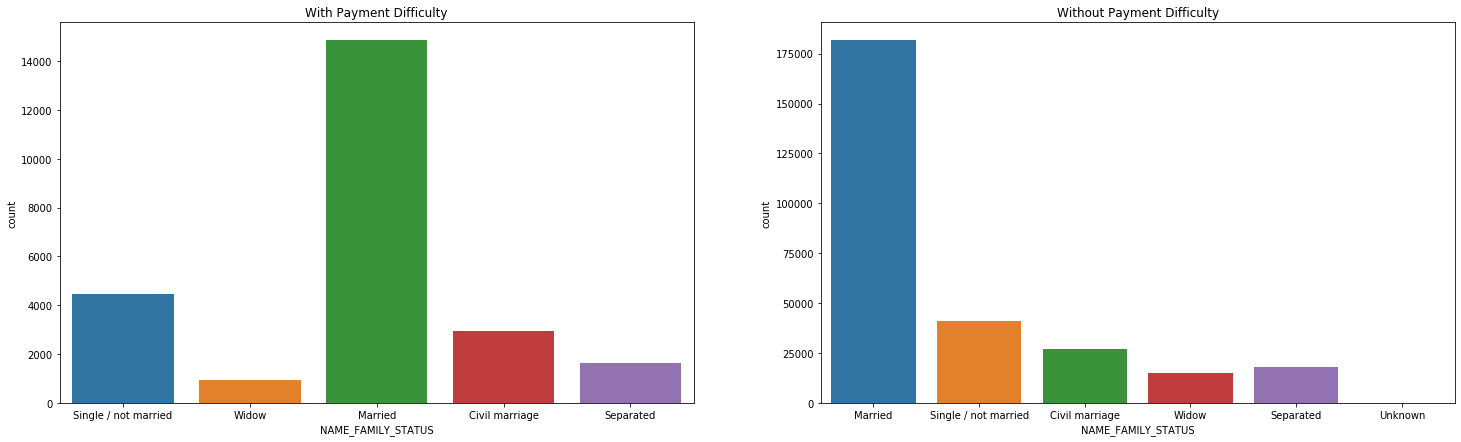

In [42]:
# NAME_FAMILY_STATUS column for both Target types

plt.figure(figsize = (25, 7))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(df_1['NAME_FAMILY_STATUS'])


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(df_0['NAME_FAMILY_STATUS'])
plt.show()

For both the target population, number of married applicants is much higher as compared to the other categories.

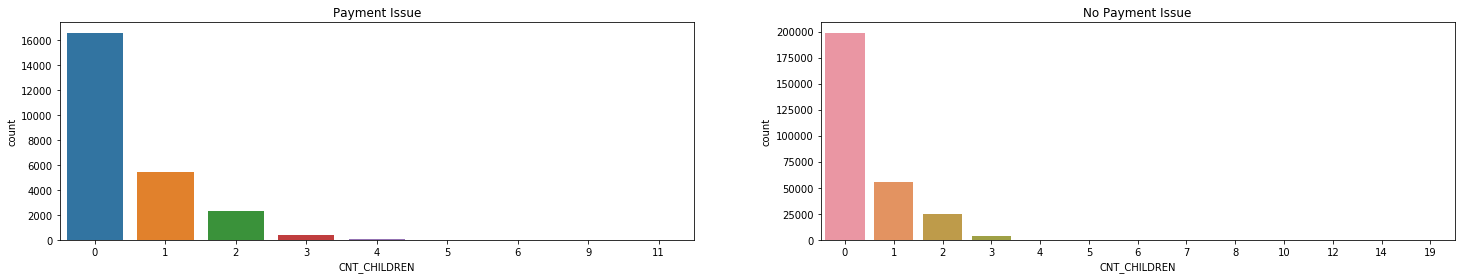

In [43]:
# CNT_CHILDREN column for both Target types

plt.figure(figsize = (25, 4))
plt.subplot(1,2,1)
plt.title("Payment Issue")
sns.countplot(df_1['CNT_CHILDREN'])


plt.subplot(1,2,2)
plt.title("No Payment Issue")
sns.countplot(df_0['CNT_CHILDREN'])
plt.show()

Most of the applicants have 0 children.

### Bivariate analysis

#### Continous vs continous

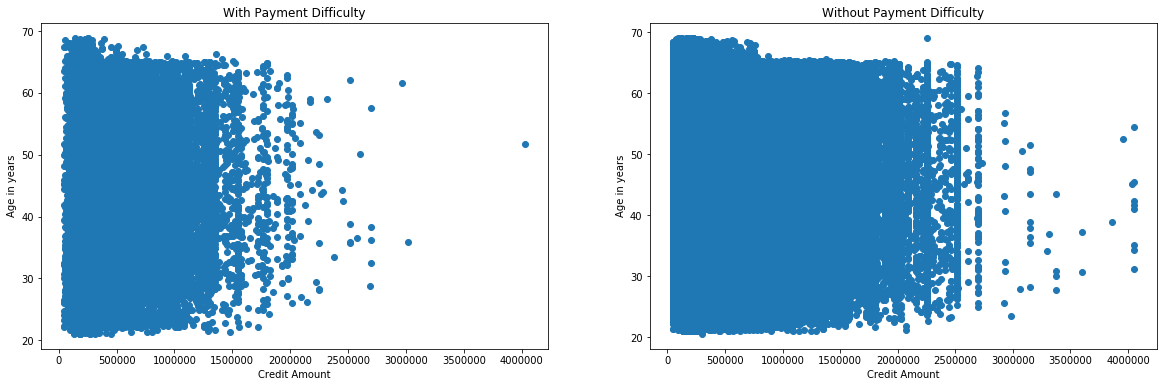

In [44]:
# AMT_CREDIT vs DAYS_BIRTH

plt.figure(figsize = (20, 6))
plt.subplot(1,2,1)
plt.ylabel("Age in years")
plt.xlabel("Credit Amount")
plt.title("With Payment Difficulty")
plt.scatter( df_1['AMT_CREDIT'],df_1['DAYS_BIRTH'].apply(lambda x: x/365))


plt.subplot(1,2,2)
plt.ylabel("Age in years")
plt.xlabel("Credit Amount")
plt.title("Without Payment Difficulty")
plt.scatter( df_0['AMT_CREDIT'],df_0['DAYS_BIRTH'].apply(lambda x: x/365))
plt.show()

The number of applicants having Credit Amount more than 30 Lacs is significantly more for the people without payment difficulty for all the age groups. 

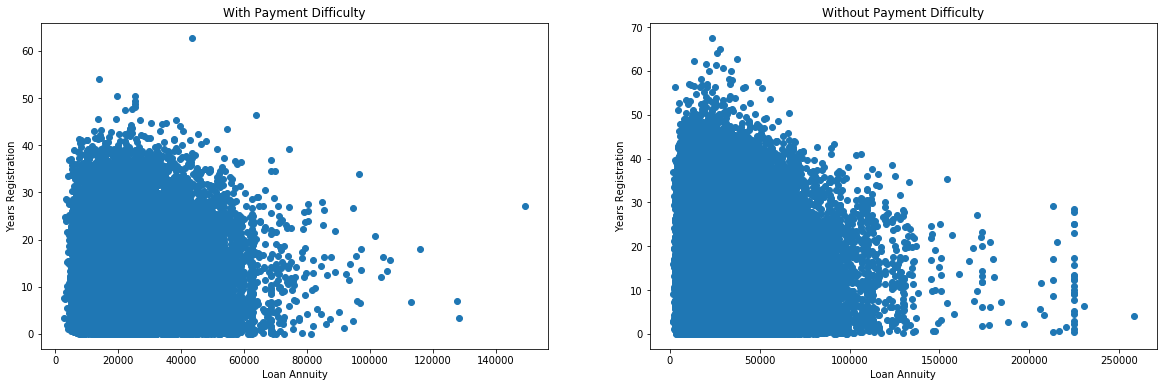

In [45]:
# AMT_ANNUITY vs DAYS_REGISTRATION

plt.figure(figsize = (20, 6))
plt.subplot(1,2,1)
plt.ylabel("Years Registration")
plt.xlabel("Loan Annuity")
plt.title("With Payment Difficulty")
plt.scatter( df_1['AMT_ANNUITY'],df_1['DAYS_REGISTRATION'].apply(lambda x: x/365))


plt.subplot(1,2,2)
plt.ylabel("Years Registration")
plt.xlabel("Loan Annuity")
plt.title("Without Payment Difficulty")
plt.scatter( df_0['AMT_ANNUITY'],df_0['DAYS_REGISTRATION'].apply(lambda x: x/365))
plt.show()

There are significantly more applicants with Loan Annuity above 150000 for the people without payment difficulty.
There are very few applicants having years registration more than 50 with payment difficulty

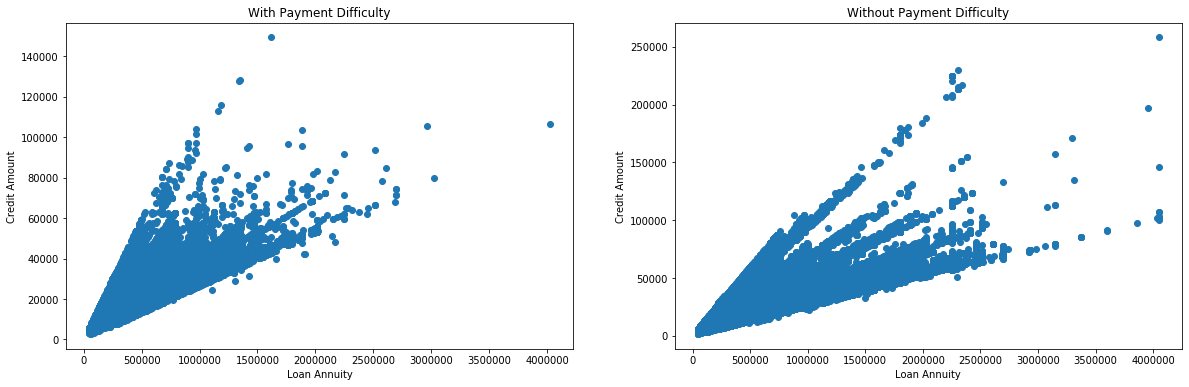

In [46]:
# AMT_ANNUITY vs DAYS_REGISTRATION

plt.figure(figsize = (20, 6))
plt.subplot(1,2,1)
plt.ylabel("Credit Amount")
plt.xlabel("Loan Annuity")
plt.title("With Payment Difficulty")
plt.scatter( df_1['AMT_CREDIT'],df_1['AMT_ANNUITY'])


plt.subplot(1,2,2)
plt.ylabel("Credit Amount")
plt.xlabel("Loan Annuity")
plt.title("Without Payment Difficulty")
plt.scatter( df_0['AMT_CREDIT'],df_0['AMT_ANNUITY'])
plt.show()

Number of people with Loan Annuity more the 25 Lacs is much more for people without payment difficulties. We can also observe, in case of Credit Amount, there are no applicants with credit amount above 150000 having payment difficulty.

#### Bivariate analysis for Continous vs Categorical columns

First for people without Payment difficulty

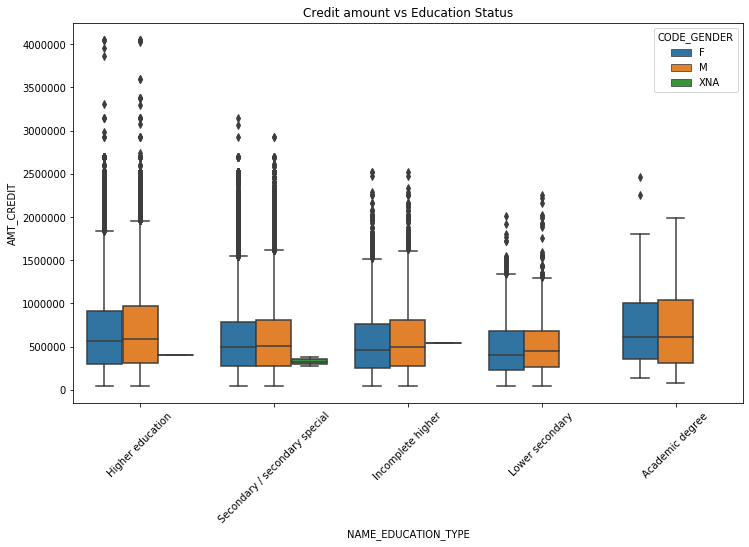

In [47]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT

plt.figure(figsize=(12,7))
plt.xticks(rotation=45)
sns.boxplot(data =df_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='CODE_GENDER',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that for both Genders of Academic degree education are having higher number of credits than others.
Also, higher education applicants of both genders are having more outliers.
Males with Academic degree are having most of the credits in the third quartile.

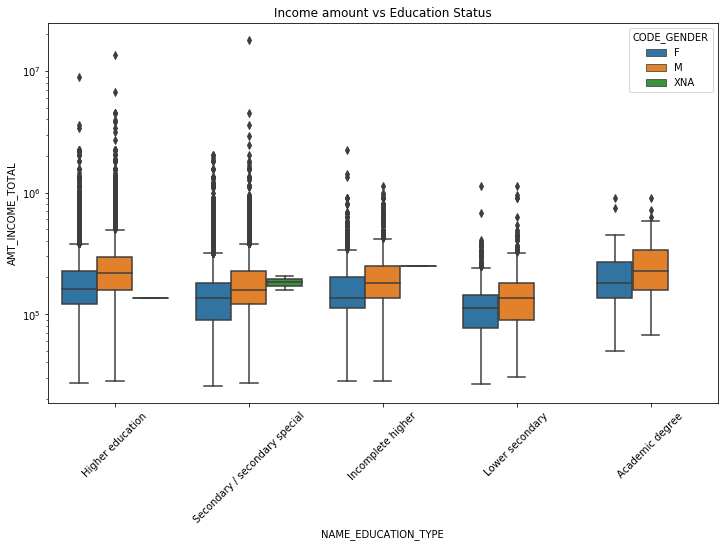

In [48]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(12,7))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot we can observe Males from all Education type have higher mean Annual salary. Higher Education and Secondary/ Secondary special contain many outliers. 

Females with Education level Lower secondary have less Annual Income than others.

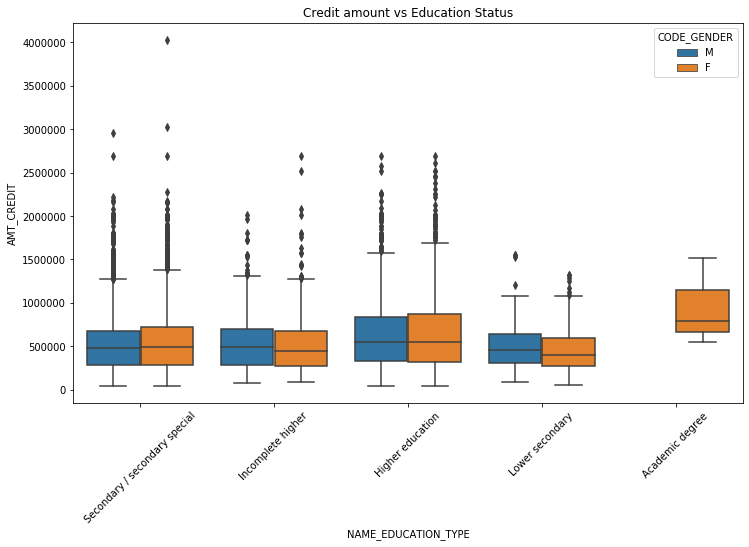

In [49]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT

plt.figure(figsize=(12,7))
plt.xticks(rotation=45)
sns.boxplot(data =df_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='CODE_GENDER',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

For the people facing Payment difficultiy, there no males having a Academic degree.
Secondary/secondary special education type have more outliers but Academic degree do not have any outliers.

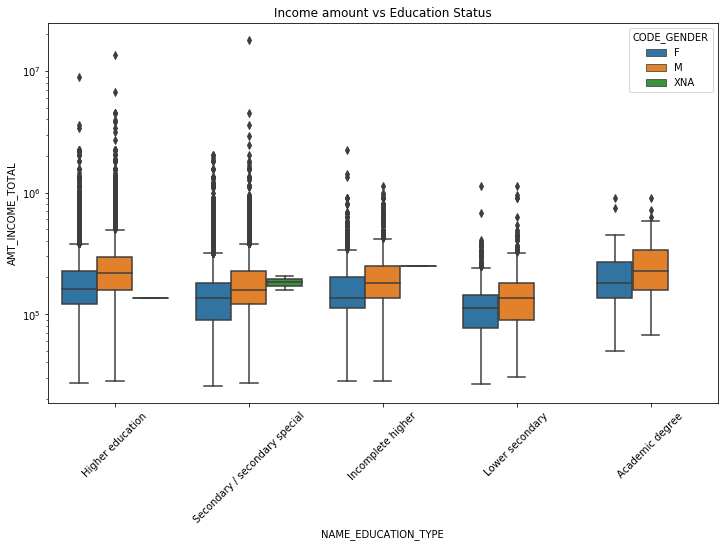

In [50]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(12,7))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

For applicants with payment difficulty, Males with Higher education degree have higher annual income.
Females with lower secondary education have very less annual income as compared to others.
Academic degree have less outliers

### Bivariate Categorical vs Categorical

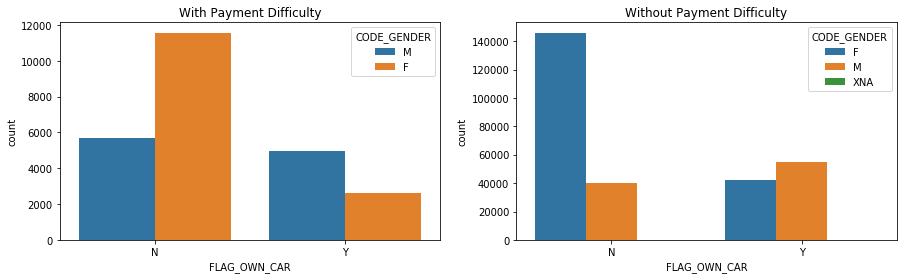

In [51]:

plt.figure(figsize = (15, 4))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'CODE_GENDER', data = df_1)


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'CODE_GENDER', data = df_0)
plt.show()

Number of Females owning a car is less in both cases. Number of Males without payment difficulty and having a car is more than those not having a car. But in case of Males with payment difficulty, number of them having a car is less than males not having a car.

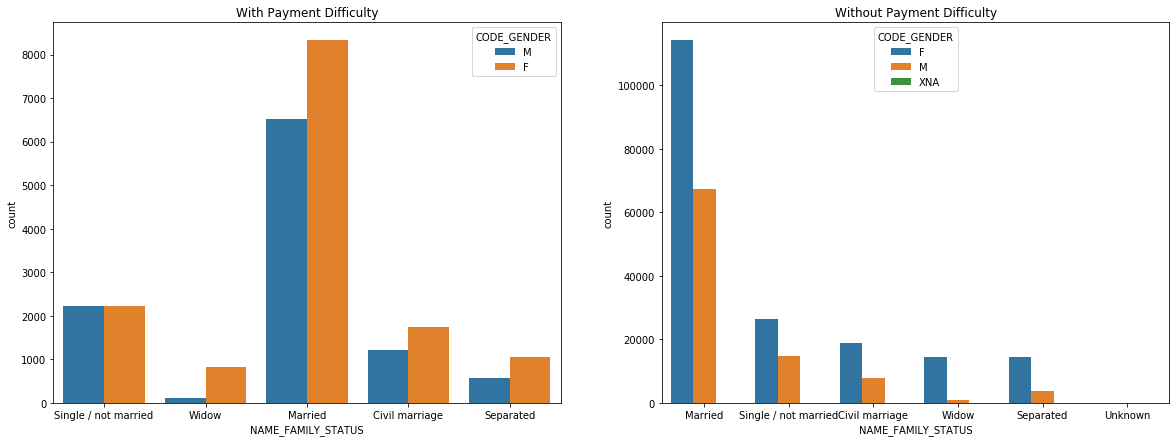

In [52]:
plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'CODE_GENDER', data = df_1)


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'CODE_GENDER', data = df_0)
plt.show()

More number of Married Female applicants faced Payment difficulties.
The ratio of males and female Single applicants is almost equal for payment difficulty, whereas the ratio of Female applicants is more than males for no payment difficulty.

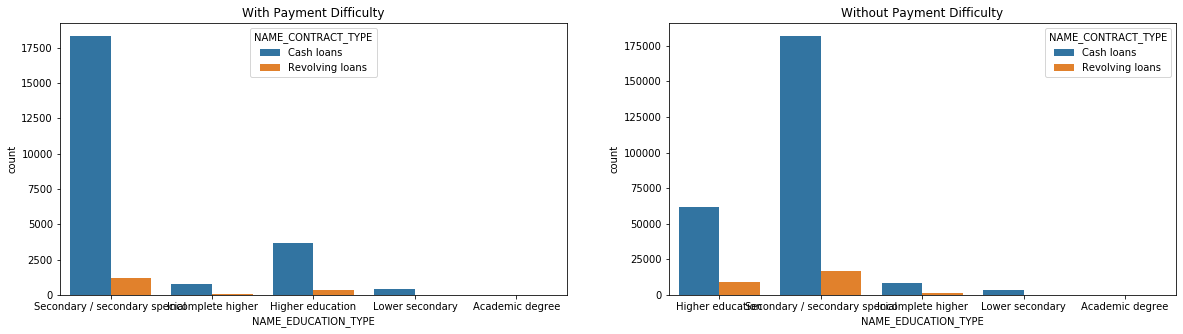

In [53]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data = df_1)


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data = df_0)
plt.show()

More female applicants who own a house facing payment difficulty

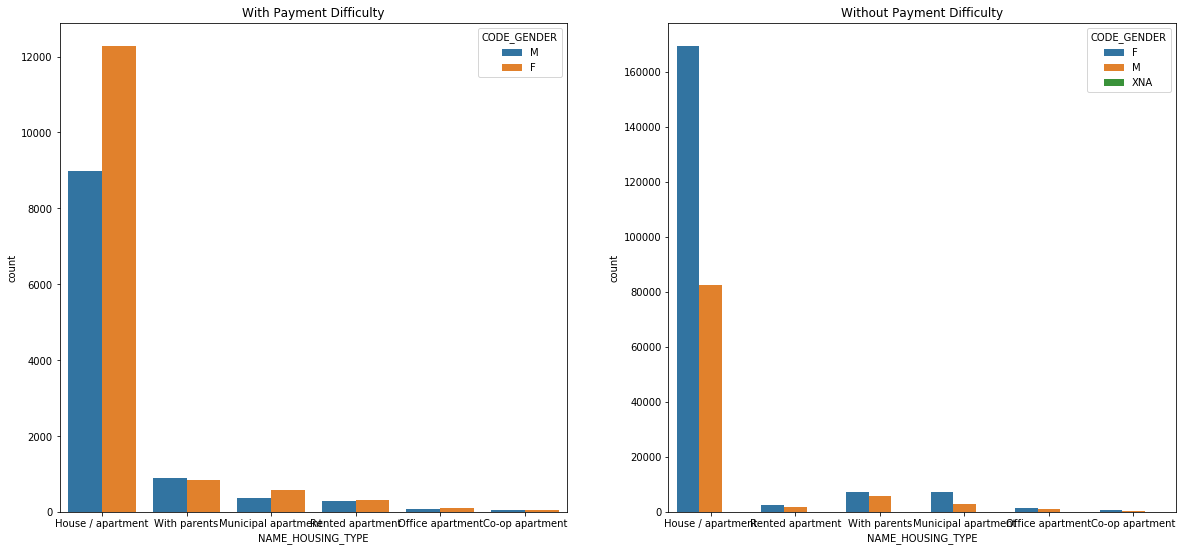

In [54]:
plt.figure(figsize = (20, 9))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'CODE_GENDER', data = df_1)


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'CODE_GENDER', data = df_0)
plt.show()

Most of the applicants own a house/apartment

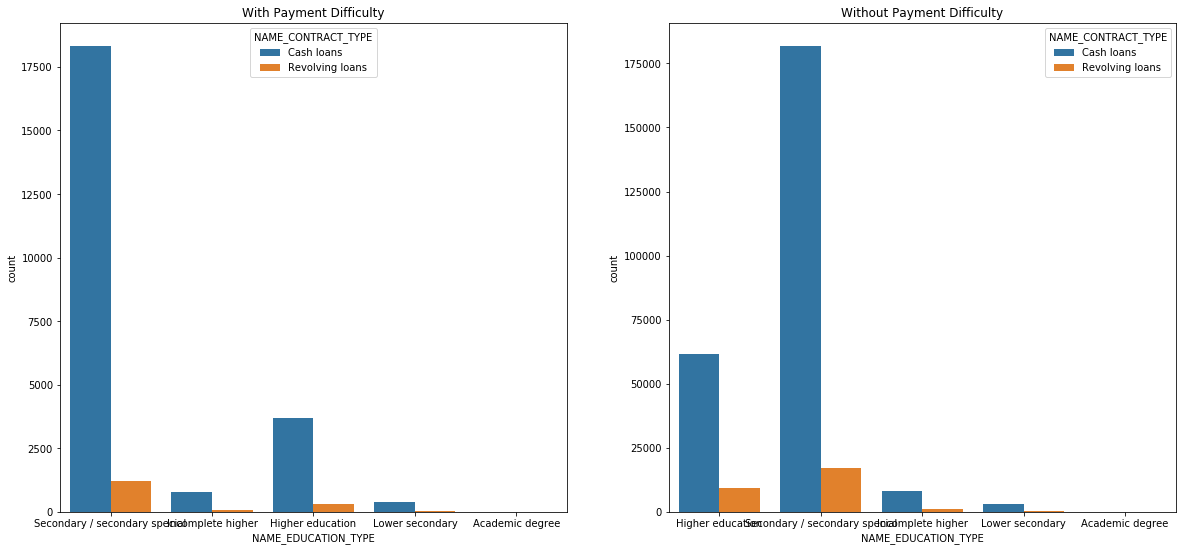

In [55]:
plt.figure(figsize = (20, 9))
plt.subplot(1,2,1)
plt.title("With Payment Difficulty")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data = df_1)


plt.subplot(1,2,2)
plt.title("Without Payment Difficulty")
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data = df_0)
plt.show()

Most of the applicants have a education level of Secondary/Secondary special with the Contract type as Cash loan

### Continous vs Categorical

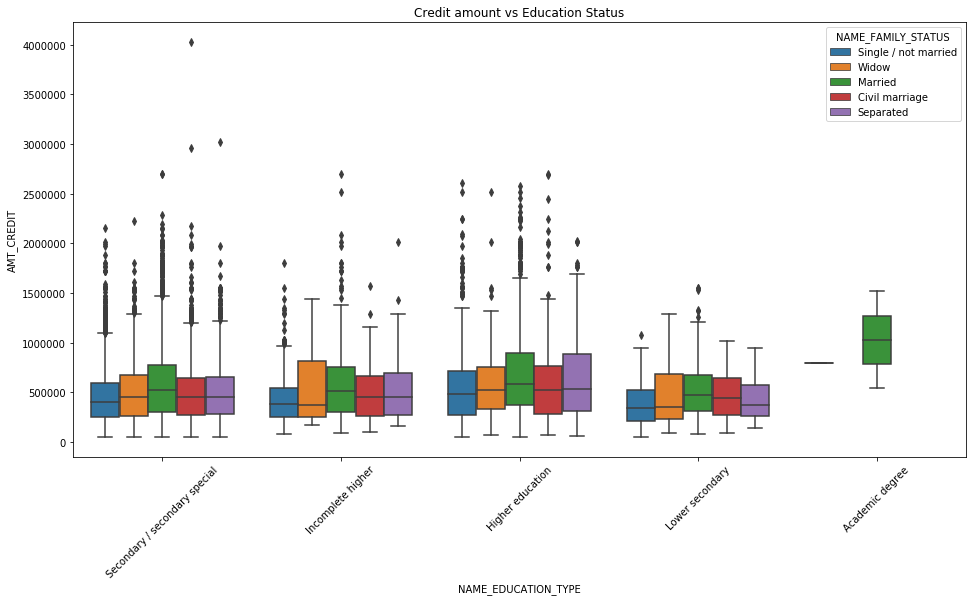

In [56]:
# AMT_CREDIT vs NAME_FAMILY_STATUS for Target 1

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.boxplot(data =df_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

Married applicants with an Academic degree have the highest Credit amount among all the other categories for the applicants with payment diffculties.

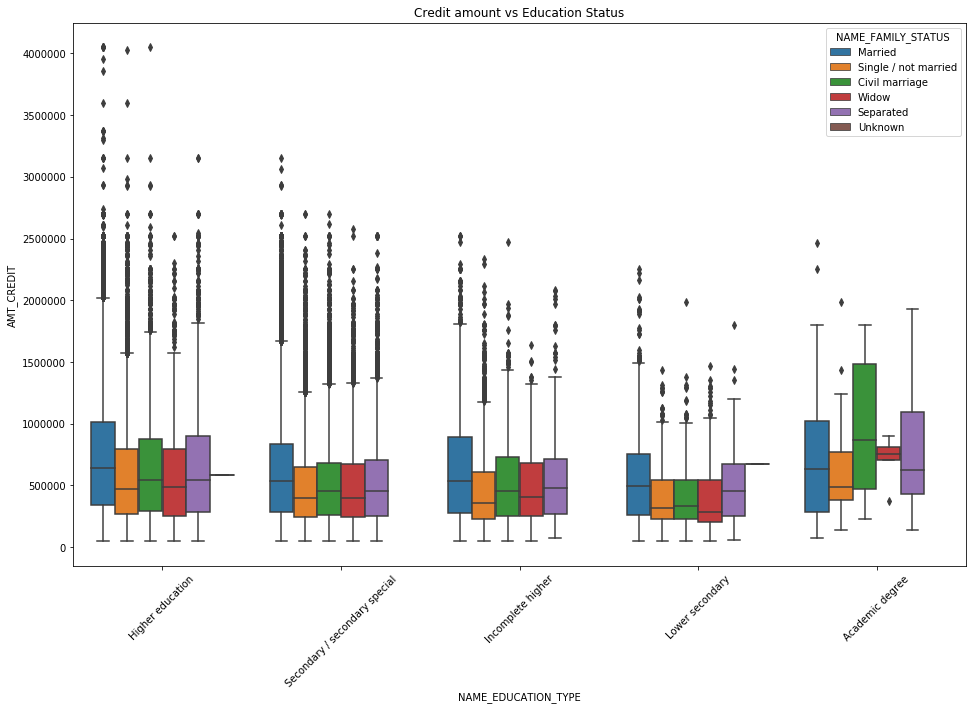

In [57]:
# AMT_CREDIT vs NAME_FAMILY_STATUS for Target 0

plt.figure(figsize=(16,10))
plt.xticks(rotation=45)
sns.boxplot(data =df_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

We can observe that for the applicants, without having difficulty with payment,  of all the Marriage types with Academic degree education the Credit amount is higher than others.And Higher education category is having more outliers.


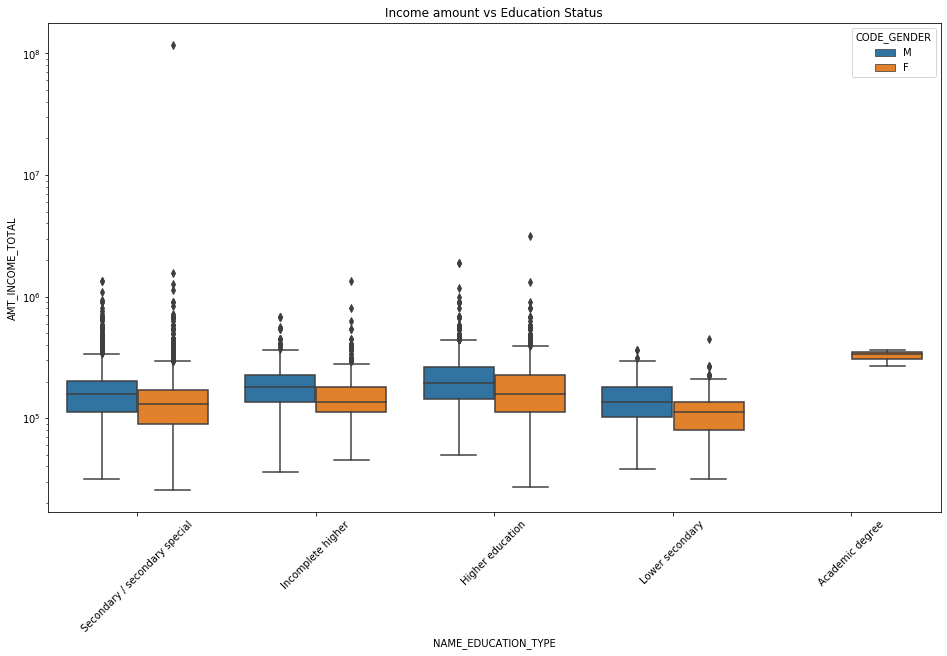

In [58]:
# NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL for Target 1

plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

For the Male applicants having payment difficulty, applicants with Higher Education degree have the highest average annual income.
Females with Academic degree have the highest Annual income.

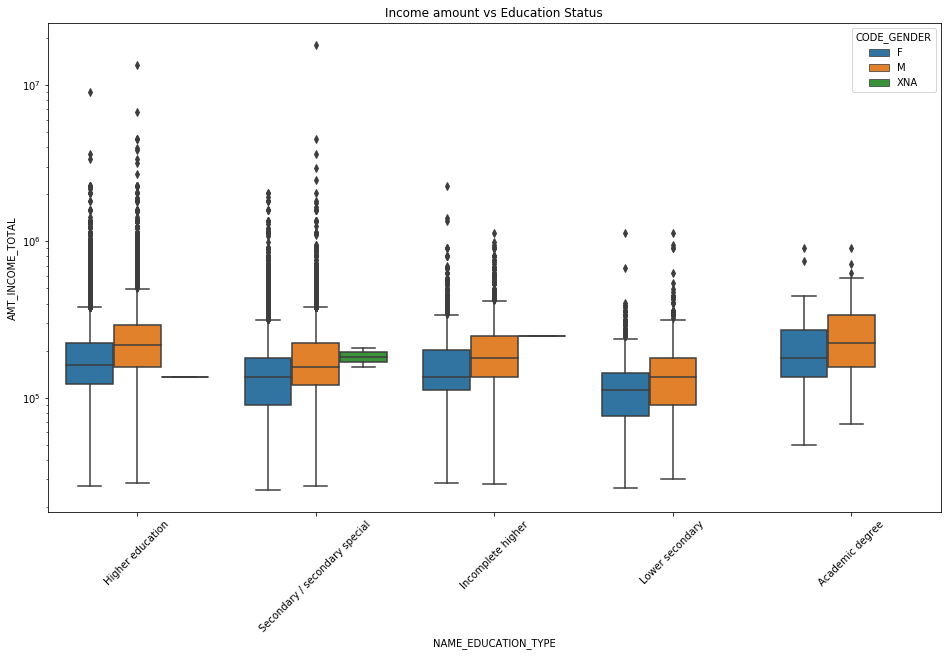

In [59]:
# NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL for Target 0

plt.figure(figsize=(16,9))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =df_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

For applicants without payment difficulty, 
Males with Academic degree have the highest average Annual Income. 
Academic degree has the least outliers.

## Finding Correlation between the numerical columns

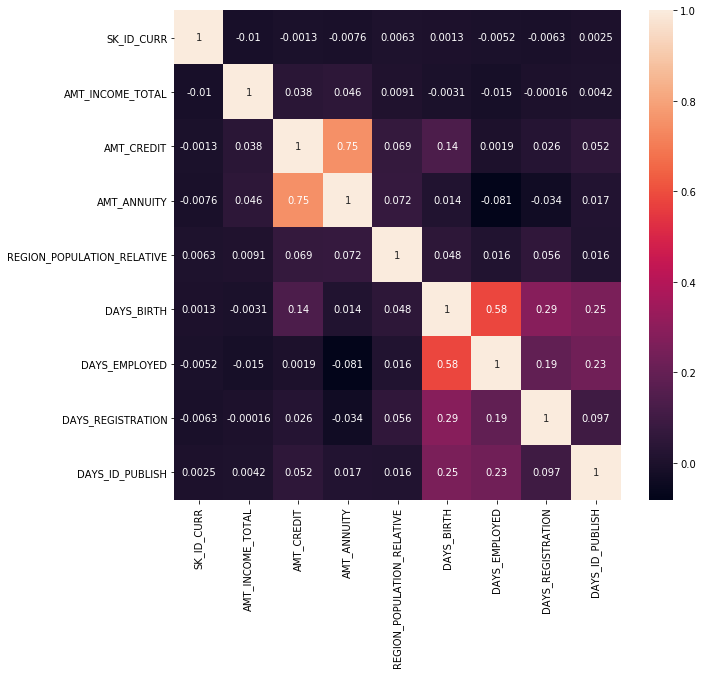

In [60]:
# Heatmap for Target = 1
plt.figure(figsize=(10,9))
sns.heatmap(df_1.corr(), annot = True)
plt.show()

In [61]:
#Correlation in Tabular format
corr = df_1.corr()
corr_df_1 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df_1 = corr_df_1.unstack().reset_index().dropna(subset = [0])
corr_df_1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_1['Corr_abs'] = abs(corr_df_1['Correlation_Value'])
corr_df_1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_1.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
29,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
59,DAYS_EMPLOYED,DAYS_BIRTH,0.582185,0.582185
68,DAYS_REGISTRATION,DAYS_BIRTH,0.289114,0.289114
77,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863,0.252863
78,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229090,0.229090
69,DAYS_REGISTRATION,DAYS_EMPLOYED,0.192455,0.192455
47,DAYS_BIRTH,AMT_CREDIT,0.135316,0.135316
79,DAYS_ID_PUBLISH,DAYS_REGISTRATION,0.096833,0.096833
57,DAYS_EMPLOYED,AMT_ANNUITY,-0.081207,0.081207
39,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.071690,0.071690


This observation if for Target = 1
1. So from the Heatmap and the Table we can conclude the AMT_ANNUITY and AMT_CREDIT have the highest Correlation
2. We can also observe the top 10 correlated column pairs

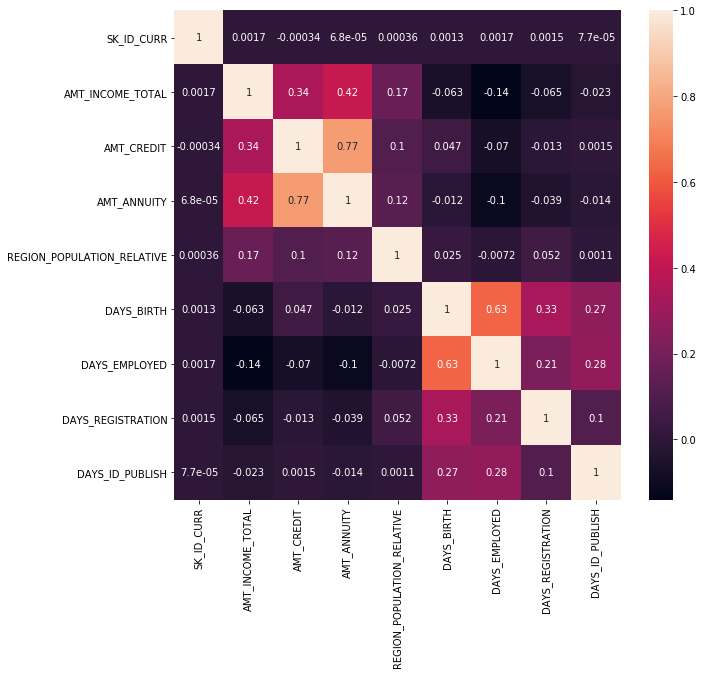

In [62]:
# Heatmap for Target = 0
plt.figure(figsize=(10,9))
sns.heatmap(df_0.corr(), annot = True)
plt.show()

In [63]:
#Correlation in Tabular format
corr = df_0.corr()
corr_df_0 = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df_0 = corr_df_0.unstack().reset_index().dropna(subset = [0])
corr_df_0.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df_0['Corr_abs'] = abs(corr_df_0['Correlation_Value'])
corr_df_0.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df_0.head(10)

,VAR1,VAR2,Correlation_Value,Corr_abs
29,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
59,DAYS_EMPLOYED,DAYS_BIRTH,0.626114,0.626114
28,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
19,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
68,DAYS_REGISTRATION,DAYS_BIRTH,0.333151,0.333151
78,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.276663,0.276663
77,DAYS_ID_PUBLISH,DAYS_BIRTH,0.271314,0.271314
69,DAYS_REGISTRATION,DAYS_EMPLOYED,0.214511,0.214511
37,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.167851,0.167851
55,DAYS_EMPLOYED,AMT_INCOME_TOTAL,-0.140392,0.140392


For Target = 0
1. Here also AMT_ANNUITY and AMT_CREDIT have the highest correlation
2. We can see after the second highest correlated columns, the rest of the Top 10 have a different order as compared to Target = 1 dataframe.

## Reading previous_application data

In [64]:
df1 = pd.read_csv('previous_application.csv')

In [65]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df1.shape

(1670214, 37)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [68]:
#Merging the application_data and previous_application csv files
df_merged = pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

### Univariate analysis for the merged data set

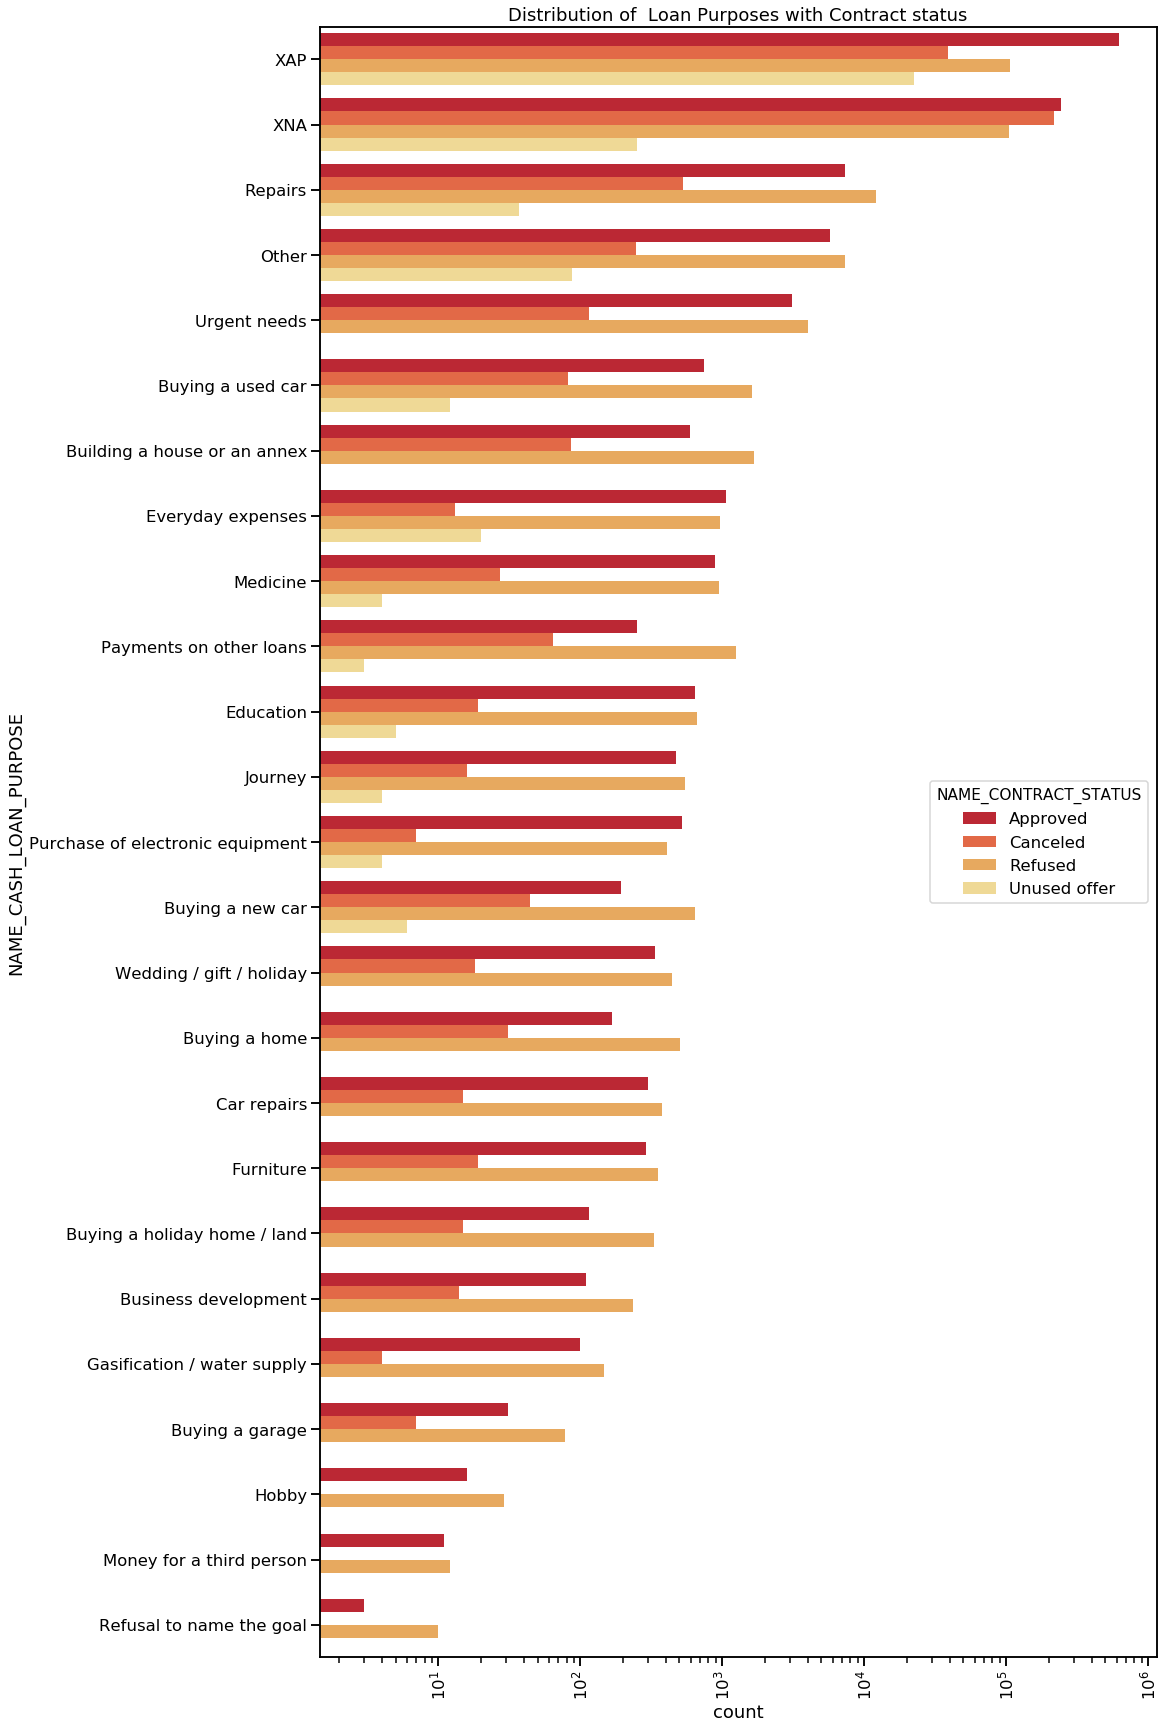

In [69]:
# Distribution of  Loan Purposes with Contract status

sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of  Loan Purposes with Contract status')
ax = sns.countplot(data = df_merged, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='YlOrRd_r') 

Observations from the above plot:

1. Most rejection of loans came from purpose 'Repairs'.

2. For Payment on other loans and Buying a new car have significantly higher rejection ratio than approved.

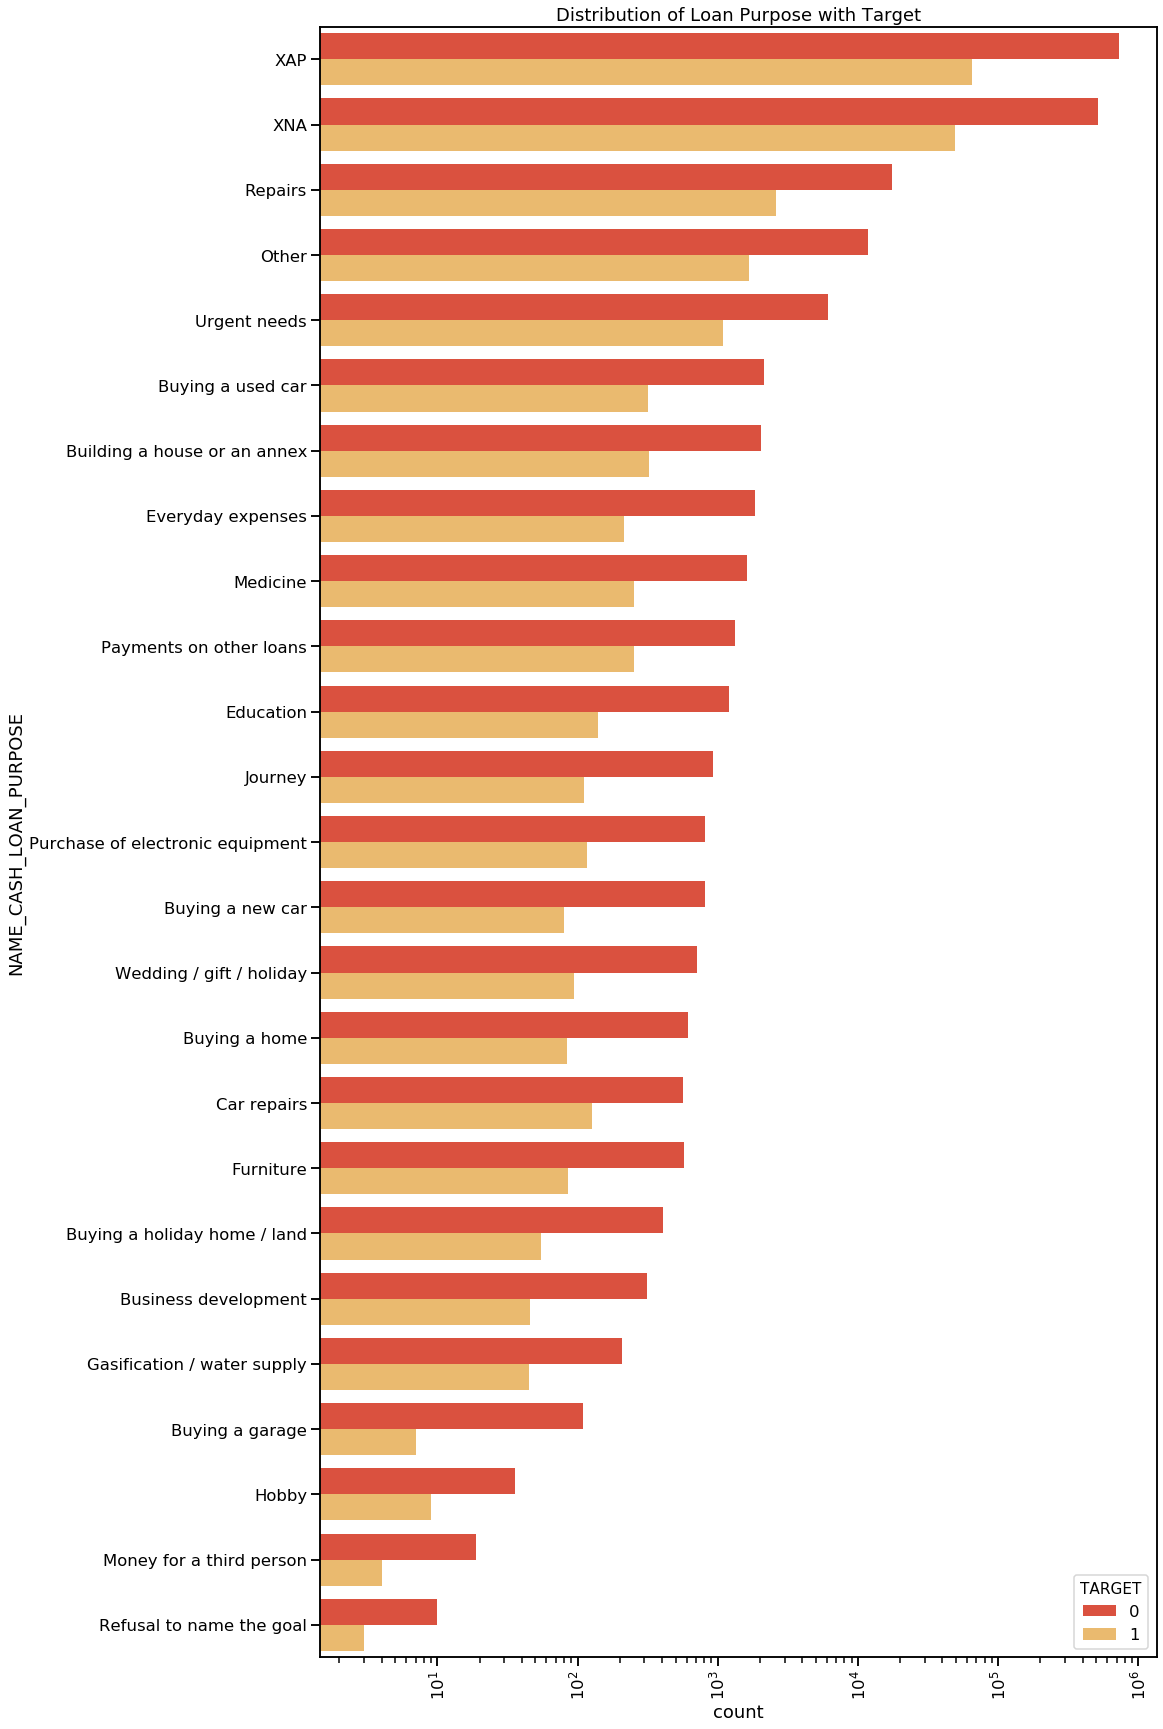

In [70]:
# Distribution of Loan Purpose with Target

sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Loan Purpose with Target')
ax = sns.countplot(data = df_merged, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='YlOrRd_r')

 Loan purposes with 'Repairs' are facing more difficulites in payment on time.

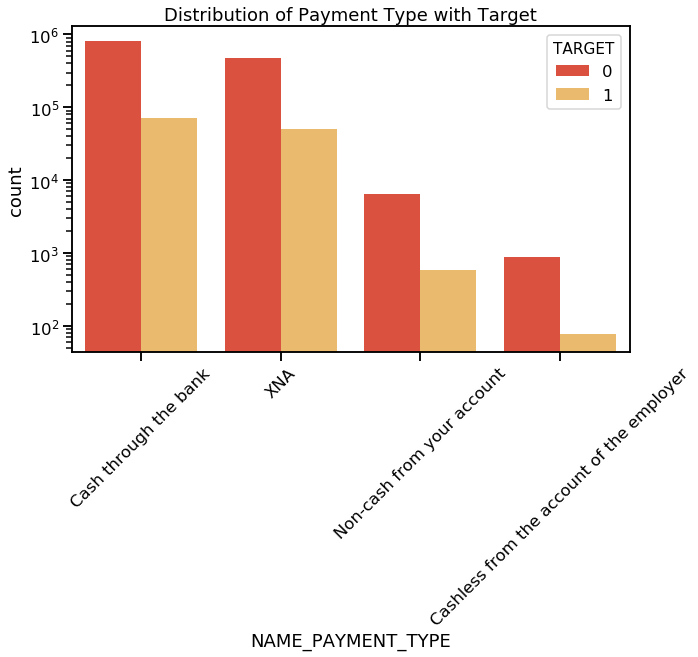

In [71]:
# Distribution of Payment Type with Target 

sns.set_context('talk')
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution of Payment Type with Target')
ax = sns.countplot(data = df_merged, x= 'NAME_PAYMENT_TYPE', 
                   order=df_merged['NAME_PAYMENT_TYPE'].value_counts().index,hue = 'TARGET',palette='YlOrRd_r')

1. Applicants with Payment type as 'Cash through the bank' are facing the most difficulties with payment.
2. Also applicants with Payment type ' Cashless from the account of the employer' face the least difficulty with payment.

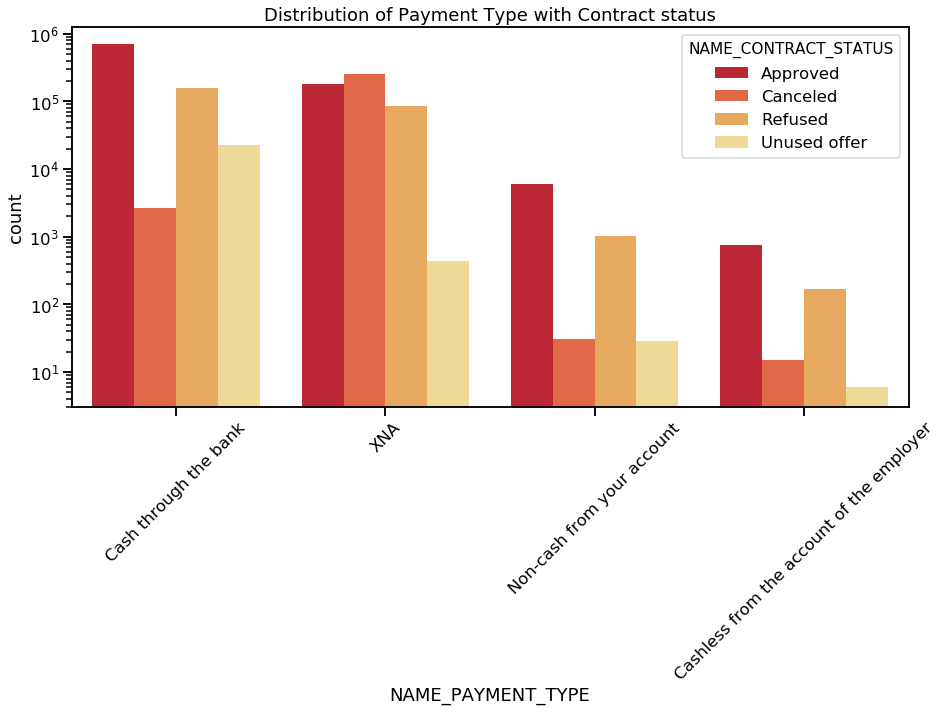

In [72]:
# Distribution of Payment Type with Contract status

sns.set_context('talk')
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
plt.yscale('log')
plt.title('Distribution of Payment Type with Contract status')
ax = sns.countplot(data = df_merged, x= 'NAME_PAYMENT_TYPE', 
                   order=df_merged['NAME_PAYMENT_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='YlOrRd_r')

1. Again it can be observed that applicants with Payment type of 'Cash through bank' have a higher refusal rate as compared to other modes of payment
2. Applicants with Payment type 'Cashless from the account of the employer' face the least refusal rate

## Bivariate analysis

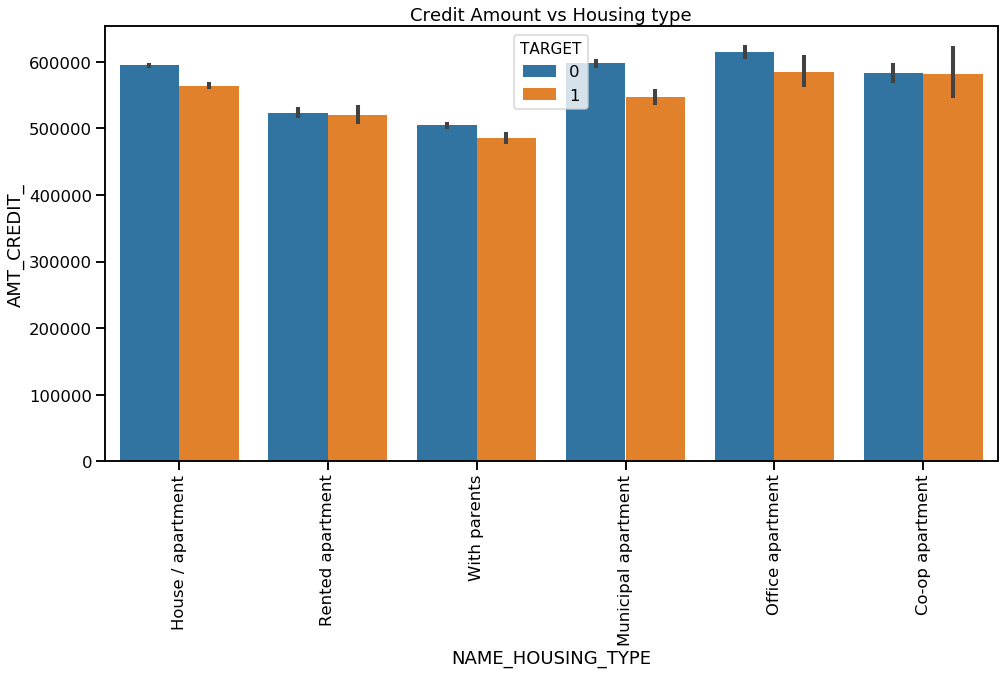

In [73]:
# Credit Amount vs Housing type

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, y='AMT_CREDIT_',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Credit Amount vs Housing type')
plt.show()

1. Applicants staying with parents face the least difficulty in repaying the loan.
2. Office apartment and Co-op apartment applicants face the most difficulty in repaying the loan.

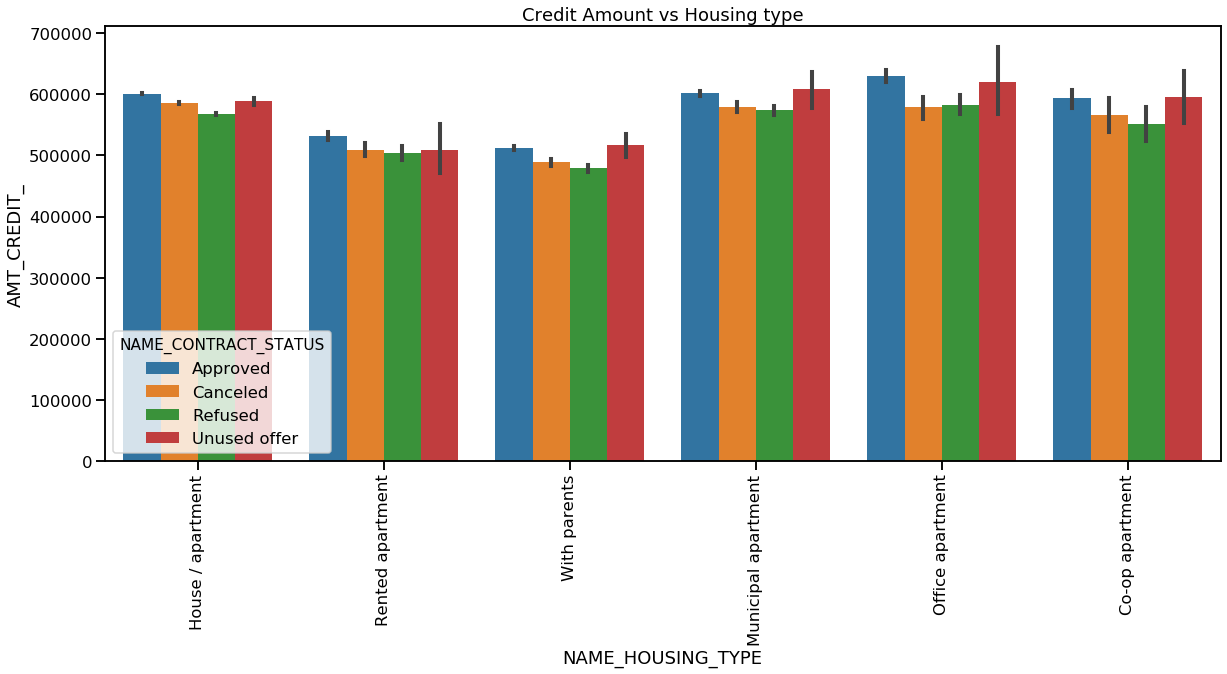

In [74]:
#Credit Amount vs Housing type

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, y='AMT_CREDIT_',hue='NAME_CONTRACT_STATUS',x='NAME_HOUSING_TYPE')
plt.title('Credit Amount vs Housing type')
plt.show()

1. Refusal rate is higher for applicants staying in office apartments
2. House apartment and Municipal apartment have similar approval rate.

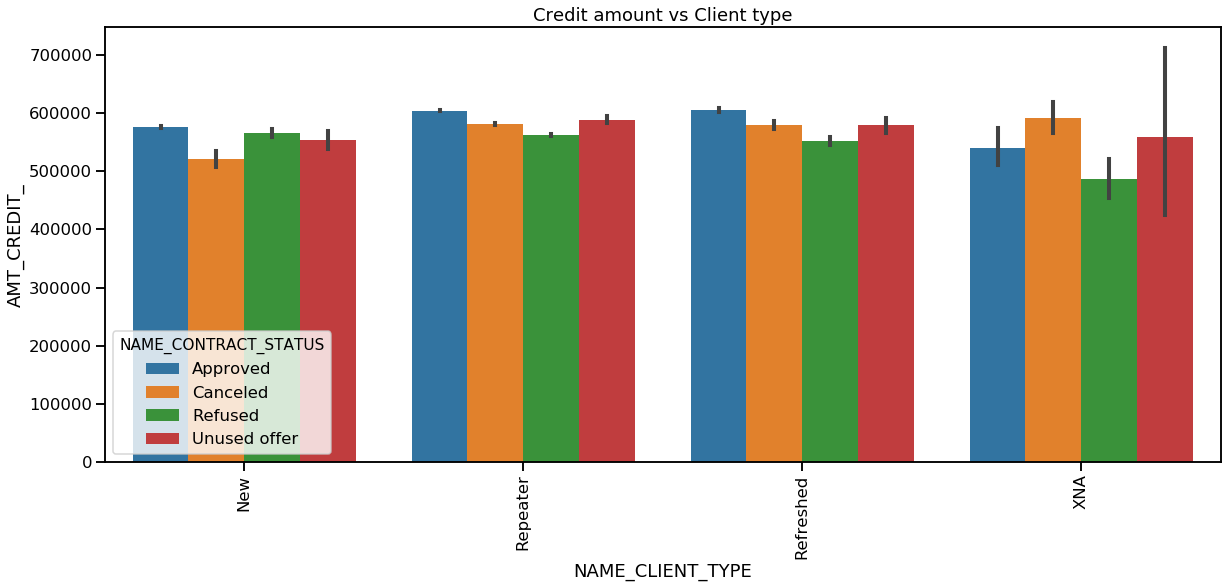

In [75]:
#Credit amount vs Client type

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, y='AMT_CREDIT_',hue='NAME_CONTRACT_STATUS',x='NAME_CLIENT_TYPE')
plt.title('Credit amount vs Client type')
plt.show()

We can observe :
1. New clients have a higher refusal rate.
2. Repeater and Refreshed have the highest approval rate.

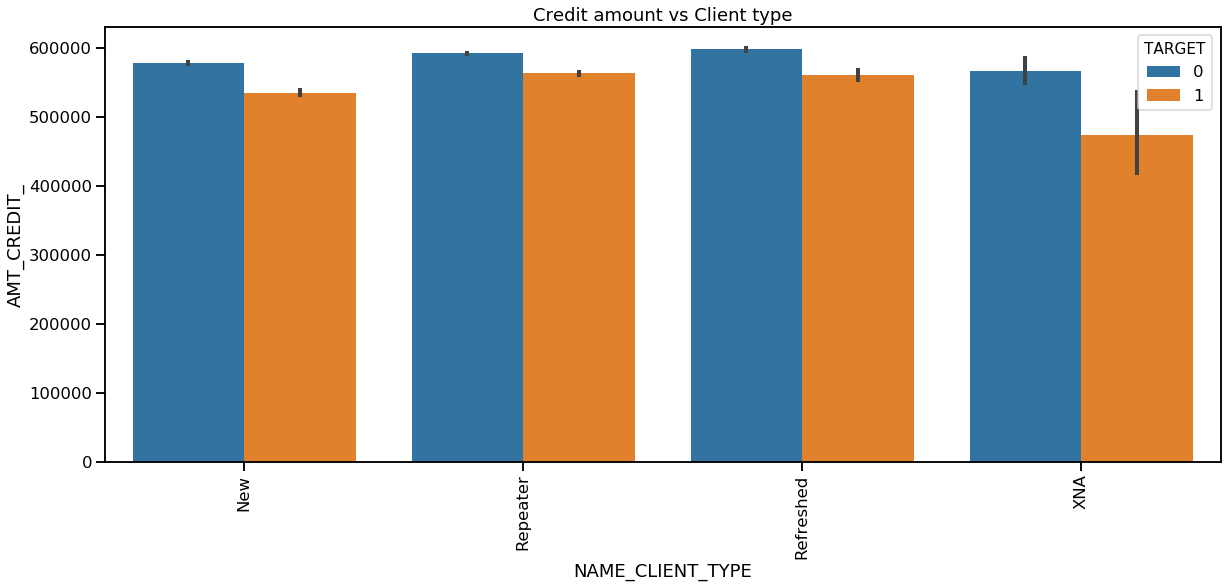

In [76]:
# Credit amount vs Client type

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, y='AMT_CREDIT_',hue='TARGET',x='NAME_CLIENT_TYPE')
plt.title('Credit amount vs Client type')
plt.show()

We can observe:
1. New applicants have the least difficulty with payment.
2. Repeater and Refreshed applicants faced the most difficulty with payment.

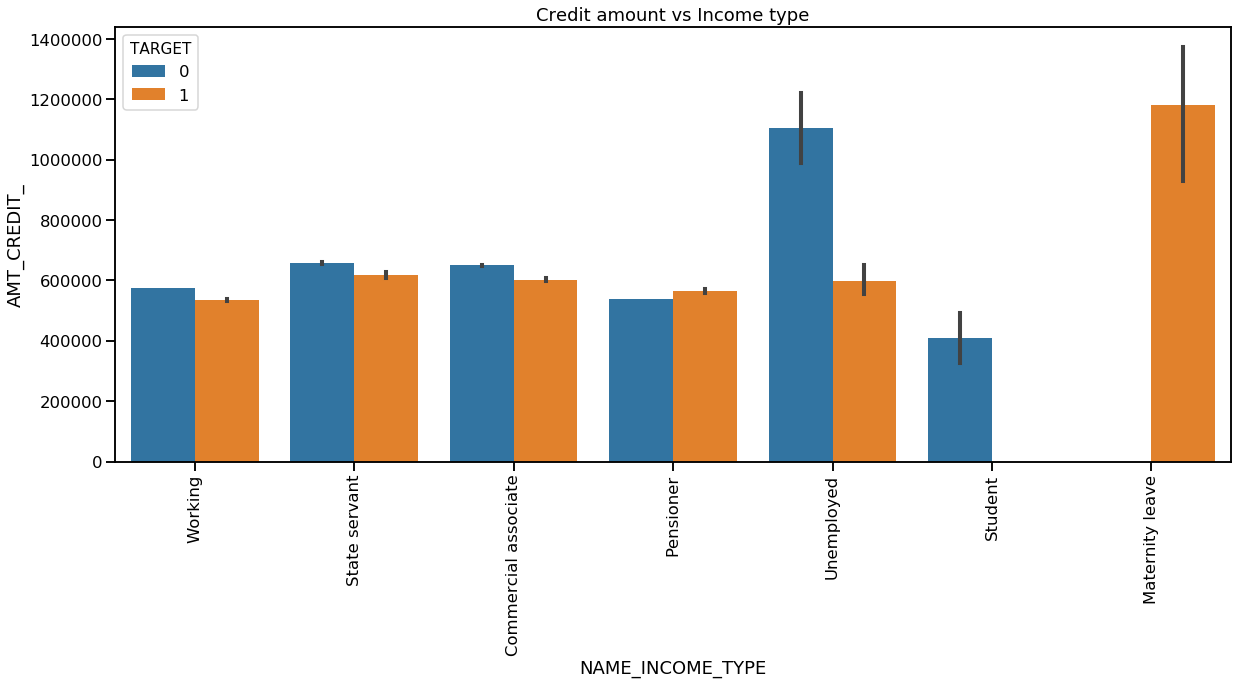

In [78]:
# Credit amount vs Income type

plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, y='AMT_CREDIT_',hue='TARGET',x='NAME_INCOME_TYPE')
plt.title('Credit amount vs Income type')
plt.show()

Observations: 

1. Applicants with Income type as 'Students' have least difficulty in repayment.
2. Applicants on Maternity leave face the most difficulty in repayment

## CONCLUSION

1. Try to avoid applicants having loan purpose as 'Repairs' as they are facing more difficulites with repayment.

2. Try to avoid Repeater and Refreshed applicants as they faced the most difficulty with the payments.

3. Try to avoid applicants staying in Office apartment and Co-op apartment as they face the most difficulty in repayment.

4. Banks should focus on Applicants having house type 'With Parents' since they are the most successful with repayment.

5. Banks should focus more on Students and commercial associate applicants as they have comparatively less payment difficulty.

